# Сборный проект №1: 'Выявление закономерностей, определяющих успешность игры на основе исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформах'

## Введение

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.

### Цель исследования

Выявить определяющие успешность игры закономерности. <br>
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Ход исследования

1. Загрузка данных и первый взгляд на них;
2. Предобработка данных: поиск и исправление ошибок в исходных данных;
3. Исследовательский анализ данных: описание и визуализация представленной информации, поиск закономерностей;
4. Составление портрета каждого пользователя;
5. Проверка гипотез;
6. Выводы.

##  Загрузка данных

In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import missingno as msno
import seaborn as sns

Общий взгляд на данные:

In [ ]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Выводы

Файл с исходными данными открыт и изучен.

Видно, что в данных есть пропуски. Некоторые типы данных можно изменить.<br>
Требуется проведение предобработки данных.

## Предобработка данных

### Визуальный осмотр пропусков

<AxesSubplot:>

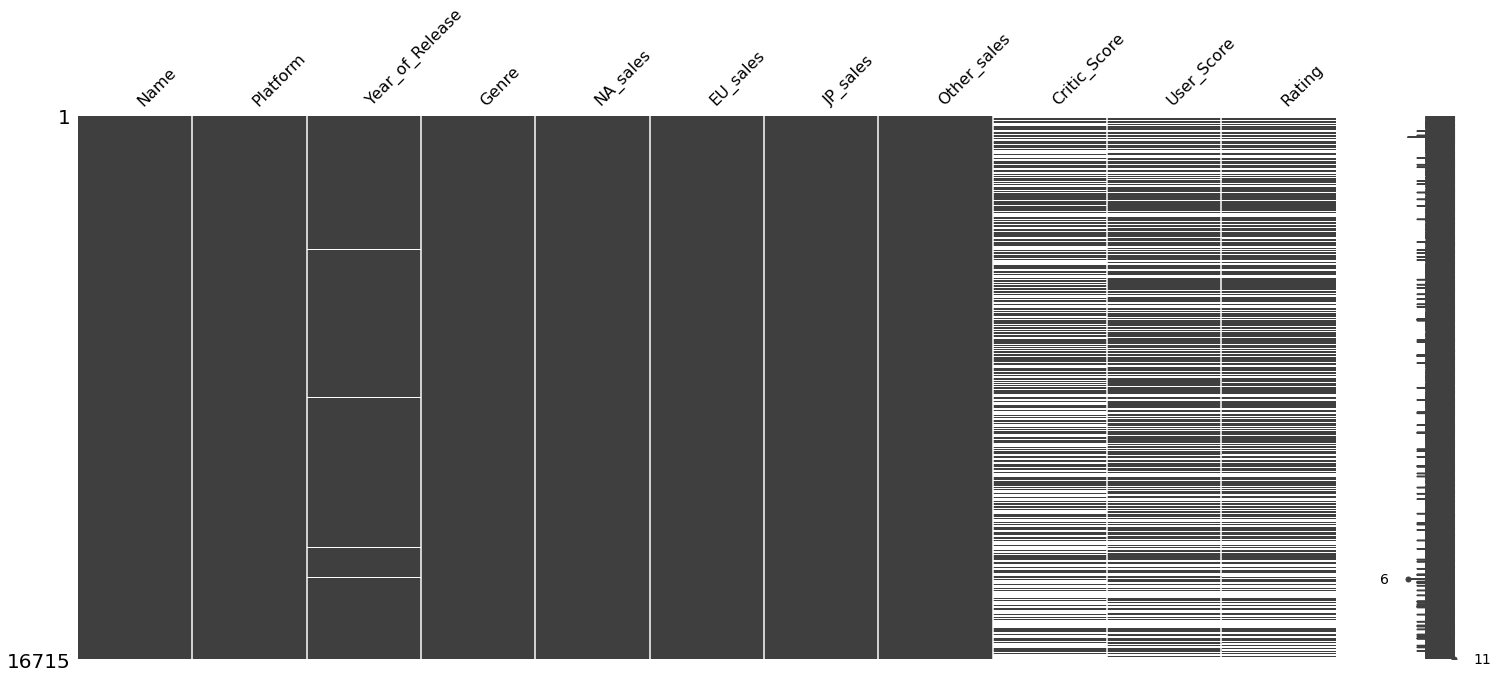

In [ ]:
%matplotlib inline
msno.matrix(data)

<AxesSubplot:>

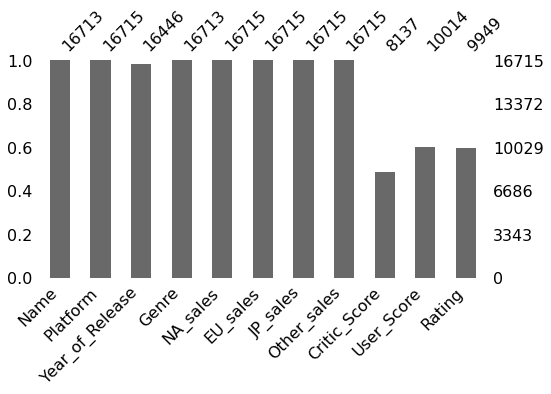

In [ ]:
msno.bar(data, figsize=(8,4))

### Приведение наименований столбцов к нижнему регистру

In [ ]:
data.columns = [c.lower() for c in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Поиск и заполнение пропущенных данных

#### Пропуски в **столбце 'name'**

Колонка имеет 2 пропущенных значения. Посмотрим на них:

In [ ]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Много пропущенных значений с этих двух строках. <bR>
    Причина появления пропусков: техническая, ведь имя игры - очень важный признак, ее название - первое, что нужно вводить в таблицу.<br>
    
Удалим пропуски, это не повлияет на репрезентативность выборки (2 строки - это 0.01% от всех строк DataFrame). Заодно и удалятся 2 из 2 пропусков в столбце 'genre':

In [ ]:
data = data.dropna(subset = ['name'])
data['name'].isna().sum()

0

#### Пропуски в **столбце 'year_of_release'**

In [ ]:
data['year_of_release'].isna().sum()

269

In [ ]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков не так много (порядка 1.6% от всех строк DataFrame). <br>
Причина появления: возможно, год релиза был необязателен для заполнения.<br>

Заполнить пропуски можно, конечно, поискав год релиза для каждой игры в интернете, но для такого количества игр это займет много времени. <br>
Можно было бы заполнить хотя бы пропуски для игр, в наименовании которых есть год, но год в названии не обязательно означает, что в этот же год был релиз (например, FIFA, NHL, у которых год релиза на 1 меньше года в наименовании игры).

Удалим пропуски (не повлияет на репрезентативность):

In [ ]:
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'].isna().sum()

0

#### Пропуски в **столбце 'сritic_score'**

In [ ]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков много (около 50%). Часто пропуски в этой колонке идут совместно с пропусками в 'user_score' и 'rating'.<br>
Причина появления: не все игры могли быть удостоены оценки критиков.<br>

Удалить столь большое количество пропусков было бы неправильно. Заполнить значения каким-либо значением не представляется возможным.<br>

Оставим пропуски на месте.

#### Пропуски в **столбце 'user_score'**

In [ ]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков много, хотя и меньше, чем в 'critic_score' (около 40%).<br>
Причина появления: не все игры могли  получить оценку от пользователей. Заполнение было необязательным.<br>

Удалить столь большое количество пропусков было бы неправильно. Заполнить значения каким-либо значением не представляется возможным.

Оставим пропуски без изменения.

Отдельно отметим значение *TBD = to be determined (подлежит определению)*. Т.е. рейтинга нет, заменим на NaN:

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].isna().sum()

8981

#### Пропуски в **столбце 'rating'**

In [ ]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков много, примерно. как изначально в 'user_score' (около 40%).<br>
Причина появления: не все игры могли получить рейтинг.<br>

Удалить столь большое количество пропусков было бы неправильно. Заполнить значения каким-либо значением сложно. Можно было бы вывести рейгинг на основании продаж в разных регионах.

Оставим пропуски без изменения.

### Изменение типа данных

Изменим тип данных в столбце 'year_of_release' на int32 для небольшой экономии памяти (сейчас пропуски удалены и это можно сделать):

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int32')
data['year_of_release'].astype

<bound method NDFrame.astype of 0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int32>

Преобразуем тип данных в столбце 'user_score' во float, чтобы при необходимости можно было производить расчеты:

In [ ]:
data['user_score'] = data['user_score'].astype('float')

### Поиск и удаление дубликатов

#### Поиск и удаление явных дубликатов

In [ ]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

#### Поиск и удаление неявных дубликатов

In [ ]:
data['name'].nunique()

11426

Столбец с наименованием игр содержит тысячи уникальных имен. Даже если будет несколько неявных дубликатов - это будет некритично.

In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В 'platform' и 'genre' неявных дубликтов не найдено.

При проверке на неявные дубликаты нескольких столбцов одновременно видим следующий результат:

In [ ]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Совпадение практически по всем столбцам, кроме продаж. Техническая ошибка? В любом случае продажи в строке 16230 совсем незначительны. Удалим строку:

In [ ]:
data = data.drop(index=16230)

Строка удалена:

In [ ]:
data.shape

(16443, 11)

### Добавление столбца с суммарными продажами во всех регионах:

In [ ]:
data.insert(8, 'total_sales', data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


### Выводы

На данном этапе были произведены следующие действия:
- выявлены и, по возможности,  обработаны пропуски в данных;
- преобразованы типы данных в колонках 'year_of_release' и 'user_score';
- проведена проверка на наличие явных (они не обнаружены) и неявных дубликатов (1 удален);
- добавлен новый столбец, в котором подсчитана общая выручка по регионам.

## Исследовательский анализ данных

### Сколько игр выпускалось за разные периоды

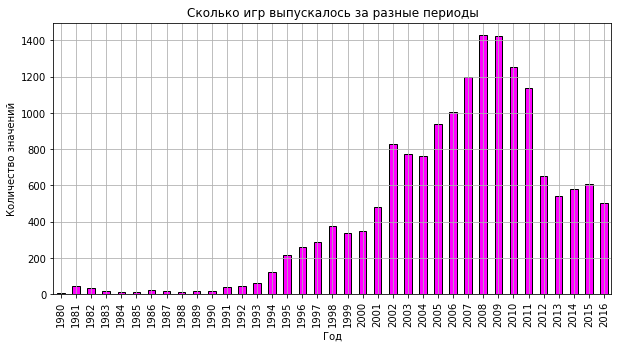

In [ ]:
(data['year_of_release']
   .value_counts(ascending=True)
   .sort_index()
   .plot(kind='bar', color='magenta', figsize=(10,5), edgecolor='black', label='без подписки', grid=True)
)
plt.title('Сколько игр выпускалось за разные периоды')
plt.xlabel('Год')
plt.ylabel('Количество значений')

pass

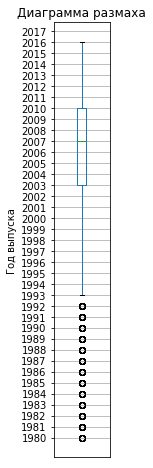

In [ ]:
data.boxplot('year_of_release', figsize=(1,8))

plt.title('Диаграмма размаха')
plt.xticks([])
plt.ylabel('Год выпуска')
plt.yticks(np.arange(1980, 2018, 1))

pass

До 1991 года количество игр изменялось несильно. Далее пошел видимый рост. Пик роста пришелся на 2008 и 2009 года, а далее пошел сильный спад.

*Важны ли данные за все периоды?*<br>
Т.к. цель работы - выявить определяющие успех игры закономерности, то стоит рассматривать более свежие игры. Кажется, что  важны данные >= 2001 года (по столбчатому графику), однако график boxplot подсказывает, что можно отсечь данные за период < 1993 года.


### Изменение продаж по платформам

С целью выявления платформ с наибольшими суммарными продажами для начала взглянем на общий график изменения продаж, разбитый по платформам:

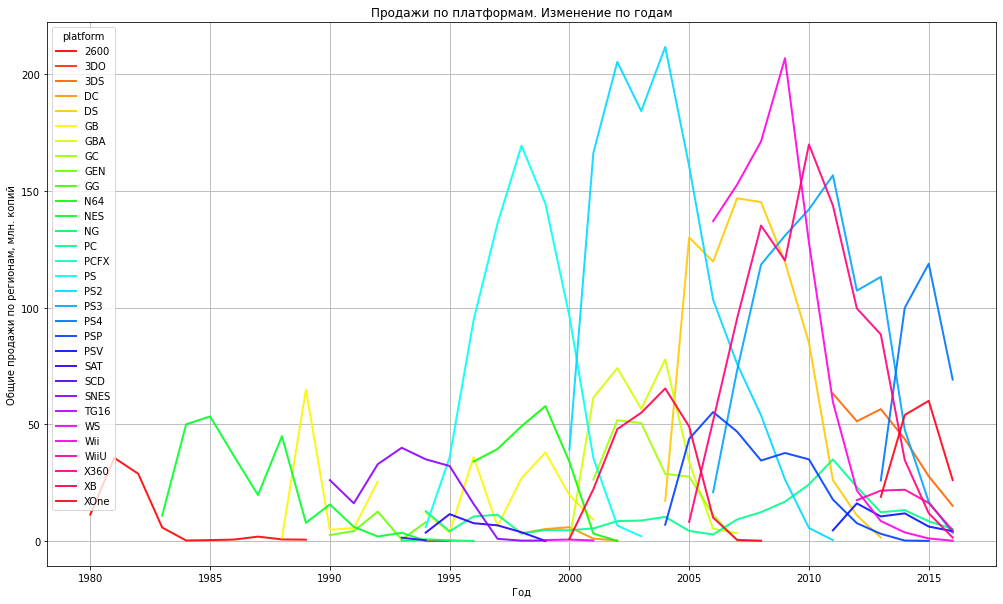

In [ ]:
(data
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(17,10), cmap='hsv', linewidth=2, alpha=0.9, grid=True)
)

plt.title('Продажи по платформам. Изменение по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи по регионам, млн. копий')
# plt.grid(axis='x')

pass

Отдельные графики в каждом окне:

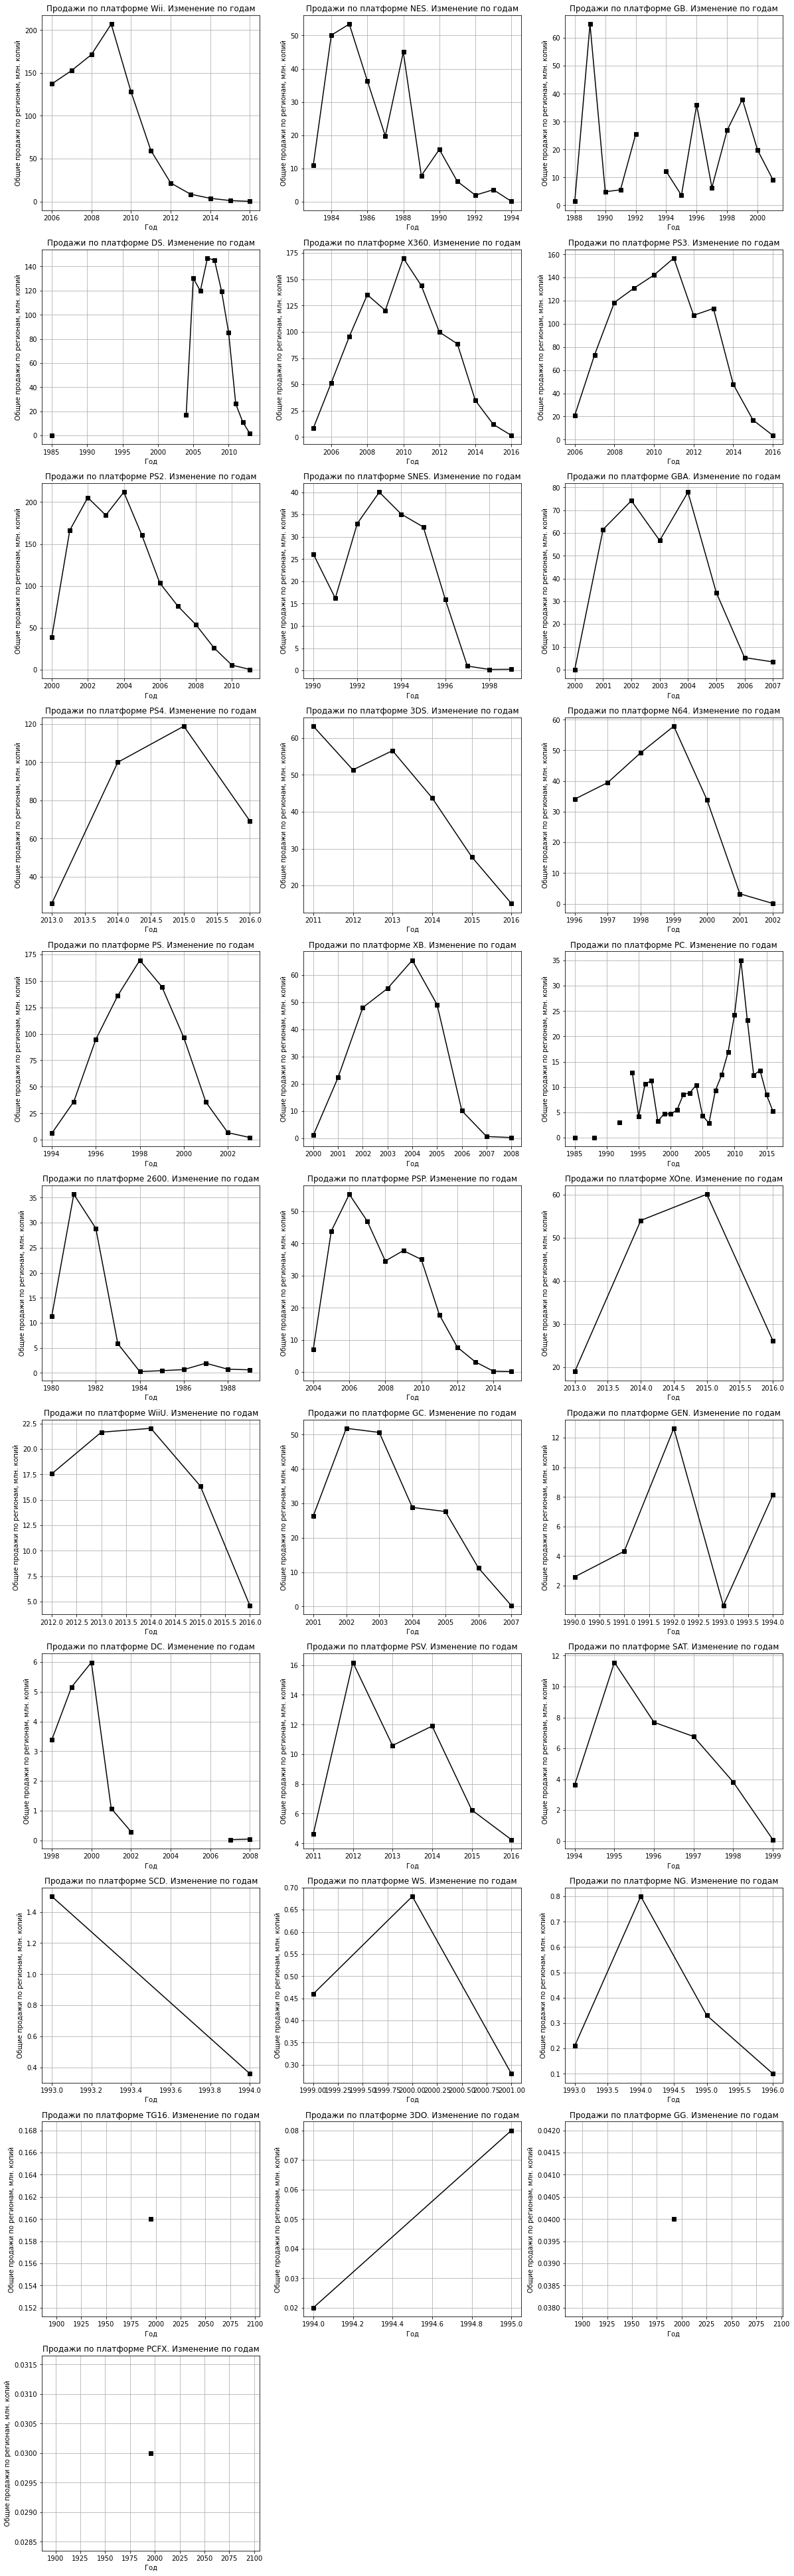

In [ ]:
fig = plt.figure(figsize=(20,200))

total_axes = data['platform'].nunique()
pivot_for_platforms = data.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
subplt = 1
for c in data['platform'].unique():
    ax = fig.add_subplot(total_axes, 3, subplt)
    pivot_for_platforms[c].plot(grid=True, style='s-', color='black')
    subplt += 1
    plt.title(f'Продажи по платформе {c}. Изменение по годам')
    plt.xlabel('Год')
    plt.ylabel('Общие продажи по регионам, млн. копий')

pass

Посмотрим, у каких платформ наибольшие суммарные продажи:

In [ ]:
(data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Для первых пяти платформ построим графики распределения их продаж по годам:

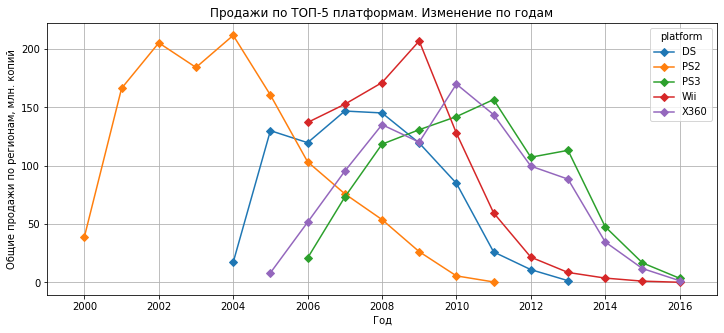

In [ ]:
(data
    .query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(12,5) , linewidth=1.5, style='D-', grid=True)
)

plt.title('Продажи по ТОП-5 платформам. Изменение по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи по регионам, млн. копий')
plt.xlim(1999, 2017) # уберем единственнную точку в 1985 году (продажи DS, в период 1985-2004 г. данных не было)
pass

Медианное 'время жизни' платформ составило 7 лет ((включая те, которые были в 2016 г.)):

In [ ]:
'''
Некорректный расчет:
(data.groupby('platform')['year_of_release'].max() - data.groupby('platform')['year_of_release'].min()).median()
'''

"\nНекорректный расчет:\n(data.groupby('platform')['year_of_release'].max() - data.groupby('platform')['year_of_release'].min()).median()\n"

In [ ]:
data.groupby('platform')['year_of_release'].nunique().median()

7.0

По представленным выше данным можно наблюдать, что многие платформы сошли с дистанции. <br>

*За какой характерный срок появляются новые и исчезают старые платформы?*<bR>
- все платформы: <bR>судя по графикам, примерное время от появления до пика продаж платформы составляет ~3 года; время от пика, до 0 составляет ~4.5 года. Медианное 'время жизни' платформы составляет 7 лет;
- ТОП-5 платформ: <br>
-- PS2 - 2 года активного роста, 2 года стабильных продаж, 7 лет спада (всего 11 лет);<br>
-- X360 - 5 лет роста, 6 лет падения (всего 8 лет);<br>
-- PS3 - 5 лет роста, 5 лет падения (всего 10 лет);<br>
-- Wii - 3 года роста, 7 лет падения (всего 10 лет);<br>
-- DS - 3 года роста, 1 год продаж на том же уровне,  5 лет падения (всего 9 лет**). <br>
Т.о. для ТОП-5 платформ среднее время жизни составляеn 10 лет.
    
** Для DS были данные в 1985 году. После - данных о продажах не было. Они появились только в 2004 г.
    <br>
    <br>
    
По графику 'Продажи по ТОП-5 платформам' можно уточнить актуальный период рассмотрения данных и взять в расчет период активности платформ, которые не еще не сошли с дистанции в 2016 году (PS3, X360, Wii).  Это период 2005-2016 гг.<br>  
Однако, учитывая высокую динамичность рынка, для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем отсечь неактуальные платформы, выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. <br>Примем период времени, равный 2014-2016 гг.

### Какие платформы лидируют по продажам, растут или падают?

- Сделаем срез данных по актуальному периоду рассмотрения данных (уточнен в предыдущем разделе):

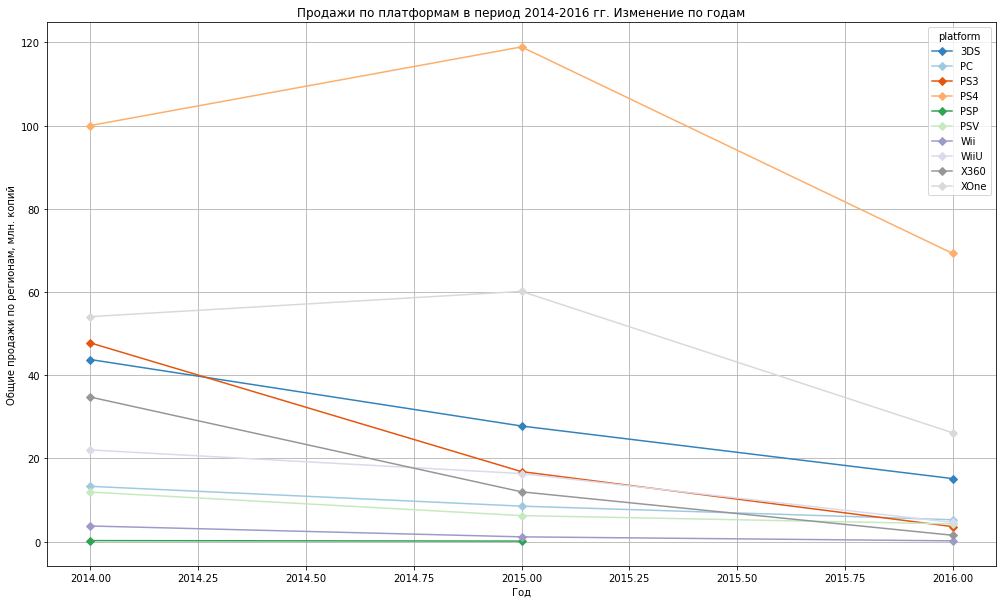

In [ ]:
data_actual_period = data.query('year_of_release >= 2014')
(data_actual_period
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(17,10) , linewidth=1.5, style='D-', cmap='tab20c', grid=True)
)

plt.title('Продажи по платформам в период 2014-2016 гг. Изменение по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи по регионам, млн. копий')

pass

**Лидеры продаж:**<br>
На момент 2016 года с большим отрывом от конкурентов по продажам лидирует PS4. <br>
Далее идет XOne. <br>
Следом - 3DS.

**Рост/падение продаж:**<br>
Судя по графику продажи игр падают у всех. Одной из главных причин, вероятно, является продолжающийся рост популярности онлайн игр (в т.ч. мобильных).


---
- Построим boxplot по по глобальным продажам игр в разбивке по платформам:

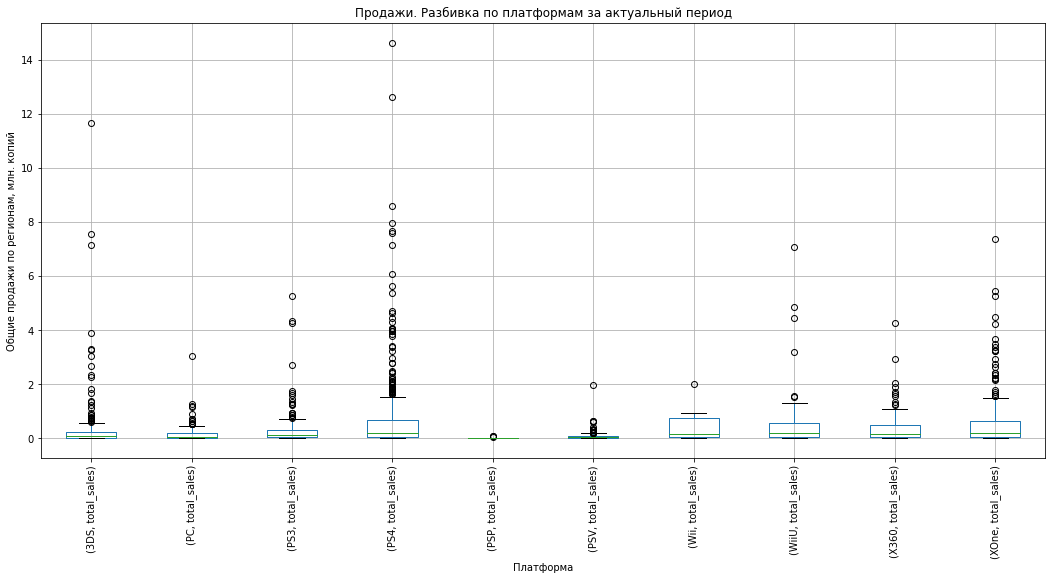

In [ ]:
(data_actual_period
    .groupby('platform')[['platform', 'total_sales']]
    .boxplot('platform', column='total_sales', figsize=(18,8), rot=90)
)

plt.title('Продажи. Разбивка по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи по регионам, млн. копий')


pass

Приблизим, убрав некоторые выбросы:

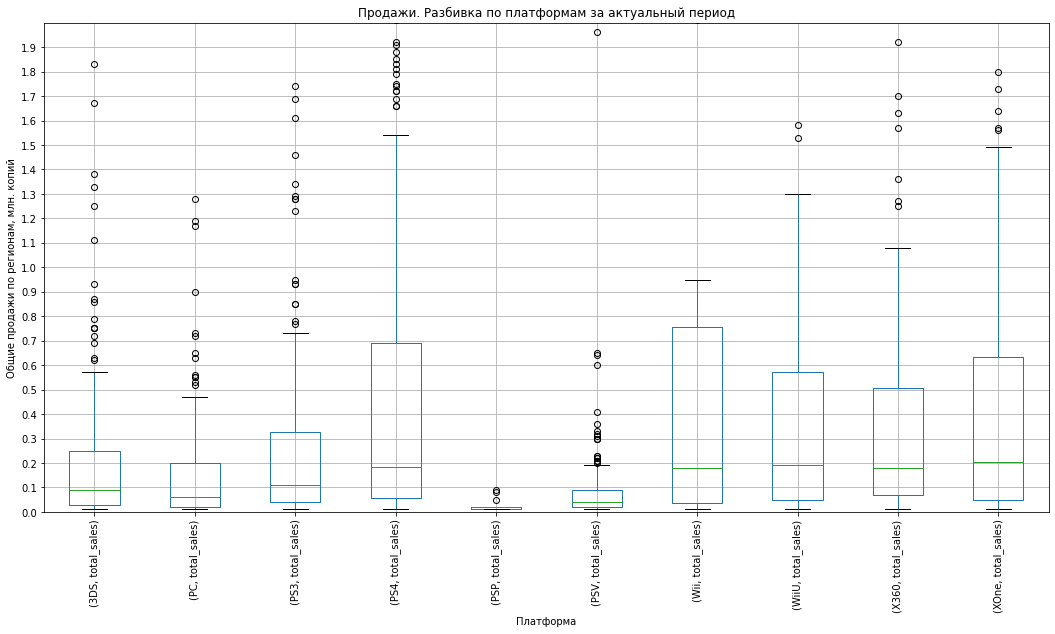

In [ ]:
(data_actual_period
    .groupby('platform')[['platform', 'total_sales']]
    .boxplot('platform', column='total_sales', figsize=(18,9), rot=90)
)

plt.title('Продажи. Разбивка по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи по регионам, млн. копий')

plt.ylim(0, 2)
plt.yticks(np.arange(0, 2, 0.1))

pass

Самый большой разброс значений в границах 1,5 межквартильного размаха у платформ PS3, PS4 и X360. <br>
Медианные значения расположены в районе продаж < 0.3 млн копий (за 1 игру) <br>
У DC, судя по всему, дела не заладились. <br>
Почти у всех платформ имеются выбросы в данных.<br>
У всех есть игры, которые не выстрелили.
<br><br>

Но посмотрим на лидеров продаж, выявленных ранее:<br>
- у XOne самое большое их них медианное значение продаж (при том, что PS4 и XOne вышли в одно время (ноябрь 2013 г., 3DS - фев 2011 г.));
- у PS4 самое большое количество проданных копий одной игры;
- у PS4 самое большое значение межквартильного размаха.

### Влияние на продажи отзывов критиков и отзывов пользователей

Для лидера продаж (PS4) построим диаграммы рассеяния, которые визуально покажут, есть ли зависимость продаж от отзывов критиков и пользователей:

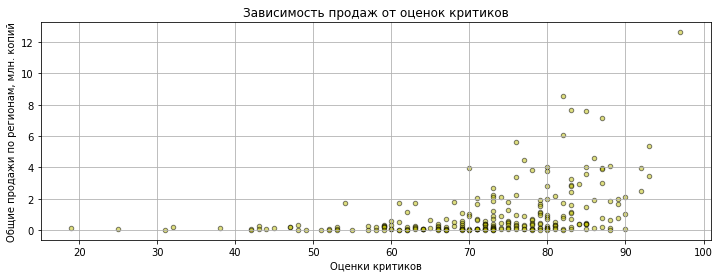

In [ ]:
(data[data['platform'] == 'PS4']
    .plot(kind='scatter', x='critic_score', y='total_sales', \
          figsize=(12,4), grid=True, alpha=0.5, color='y', ec='black')
)

plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи по регионам, млн. копий')

pass

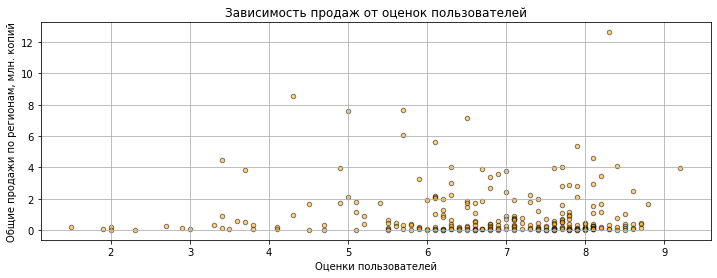

In [ ]:
(data[data['platform'] == 'PS4']
    .plot(kind='scatter', x='user_score', y='total_sales', \
          figsize=(12,4), grid=True, alpha=0.5, color='orange', ec='black')
)

plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Общие продажи по регионам, млн. копий')

pass

Построим  матрицу корреляций:

In [ ]:
# data_actual_period['critic_score'] = data_actual_period['critic_score'].fillna(-1)
# data_actual_period['user_score'] = data_actual_period['user_score'].fillna(-1)

In [ ]:
# data_actual_period['critic_score'].isna().sum()
# data_actual_period['user_score'].isna().sum()

In [ ]:
print('Корреляция продаж с оценкой критиков:', data_actual_period[(data_actual_period['platform'] == 'PS4')]['total_sales'] \
    .corr(data_actual_period[(data_actual_period['platform'] == 'PS4')]['critic_score']) \
    .round(2))

print('Корреляция продаж с оценкой пользователей:', data_actual_period[(data_actual_period['platform'] == 'PS4')]['total_sales'] \
    .corr(data_actual_period[(data_actual_period['platform'] == 'PS4')]['user_score']) \
    .round(2))

Корреляция продаж с оценкой критиков: 0.4
Корреляция продаж с оценкой пользователей: -0.04


Проанализировав диаграммы рассеяния и матрицу корреляций для платформы PS4, можно сделать следующие выводы:<br>
- общие продажи игр на платформе PS4 зависят от оценки игр критиками, эта зависимость ниже среднего;
- общие продажи игр на платформе PS4 не зависят от оценки игр пользователями.

---
- Соотнесение выводов с продажами игр на других платформах:

In [ ]:
for d in data_actual_period['platform'].unique():
    display(d, data_actual_period[(data_actual_period['platform'] == d)][['total_sales', 'critic_score', 'user_score']]
            .corr()
            .style.background_gradient(cmap='coolwarm')
            .format('{:.2f}')
           )
    print('-' * 100)

'PS4'

,total_sales,critic_score,user_score
total_sales,1.00,0.40,-0.04
critic_score,0.40,1.00,0.55
user_score,-0.04,0.55,1.00


----------------------------------------------------------------------------------------------------


'3DS'

,total_sales,critic_score,user_score
total_sales,1.00,0.31,0.22
critic_score,0.31,1.00,0.86
user_score,0.22,0.86,1.00


----------------------------------------------------------------------------------------------------


'XOne'

,total_sales,critic_score,user_score
total_sales,1.00,0.43,-0.07
critic_score,0.43,1.00,0.44
user_score,-0.07,0.44,1.00


----------------------------------------------------------------------------------------------------


'WiiU'

,total_sales,critic_score,user_score
total_sales,1.00,0.37,0.41
critic_score,0.37,1.00,0.76
user_score,0.41,0.76,1.00


----------------------------------------------------------------------------------------------------


'PS3'

,total_sales,critic_score,user_score
total_sales,1.00,0.45,-0.17
critic_score,0.45,1.00,0.69
user_score,-0.17,0.69,1.00


----------------------------------------------------------------------------------------------------


'X360'

,total_sales,critic_score,user_score
total_sales,1.00,0.53,-0.14
critic_score,0.53,1.00,0.63
user_score,-0.14,0.63,1.00


----------------------------------------------------------------------------------------------------


'PC'

,total_sales,critic_score,user_score
total_sales,1.00,0.17,-0.07
critic_score,0.17,1.00,0.47
user_score,-0.07,0.47,1.00


----------------------------------------------------------------------------------------------------


'Wii'

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,total_sales,critic_score,user_score
total_sales,1.00,nan,1.00
critic_score,nan,nan,nan
user_score,1.00,nan,1.00


----------------------------------------------------------------------------------------------------


'PSV'

,total_sales,critic_score,user_score
total_sales,1.00,0.04,-0.17
critic_score,0.04,1.00,0.52
user_score,-0.17,0.52,1.00


----------------------------------------------------------------------------------------------------


'PSP'

,total_sales,critic_score,user_score
total_sales,1.00,nan,nan
critic_score,nan,nan,nan
user_score,nan,nan,nan


----------------------------------------------------------------------------------------------------


Диаграммы рассеяния 'Зависимость продаж от оценок критиков' для остальных платформ:

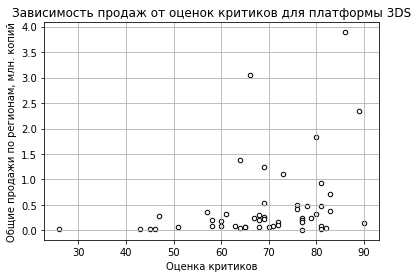

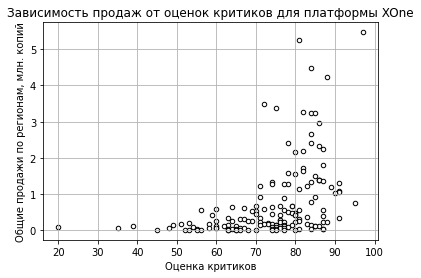

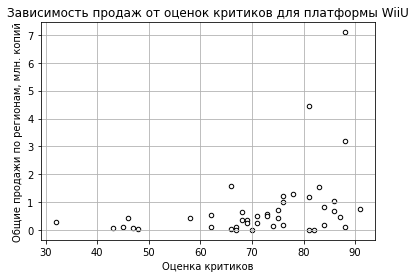

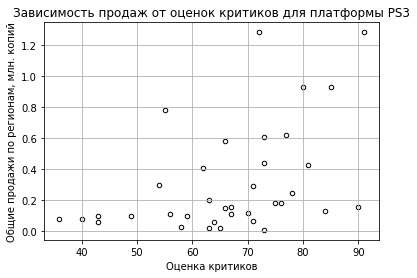

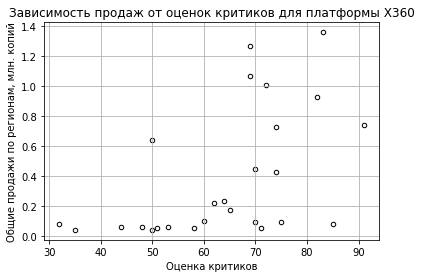

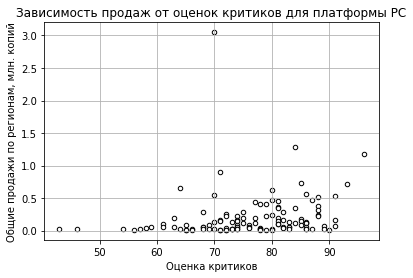

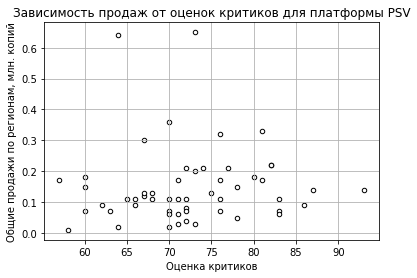

In [ ]:
for c in data_actual_period['platform'].unique():
    if c != 'PS4' and c != 'Wii' and c != 'PSP':
        data_actual_period[data_actual_period['platform'] == c] \
        .plot(kind='scatter', x='critic_score', y='total_sales', grid=True, ec='black', color='white')
        plt.title(f'Зависимость продаж от оценок критиков для платформы {c}')
        plt.xlabel('Оценка критиков')
        plt.ylabel('Общие продажи по регионам, млн. копий')


pass

Диаграммы рассеяния 'Зависимость продаж от оценок польщователей' для остальных платформ:

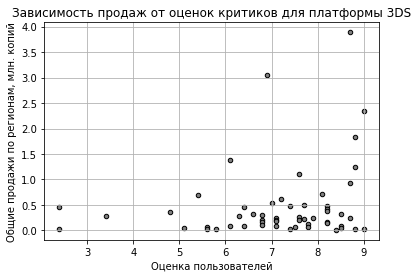

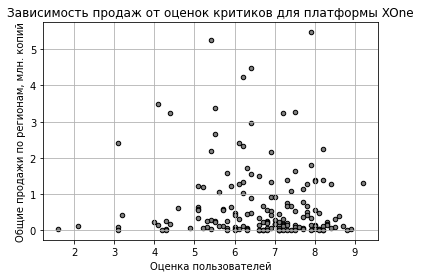

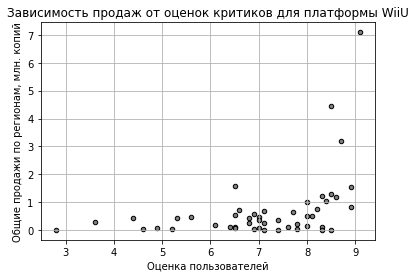

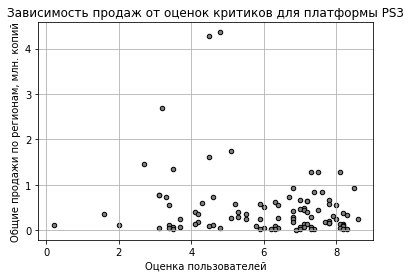

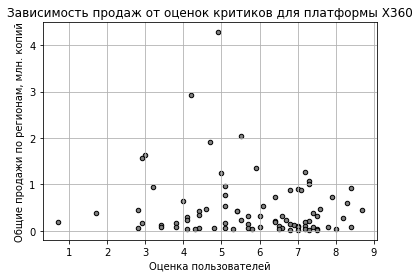

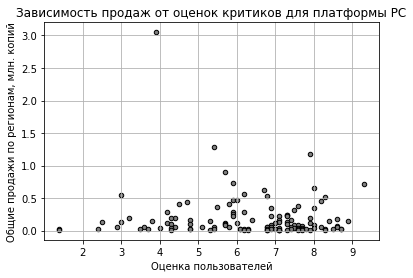

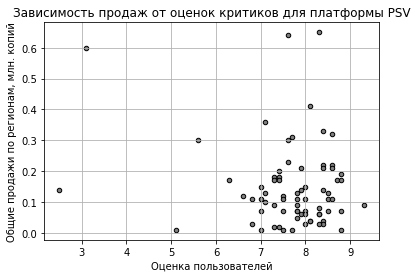

In [ ]:
for c in data_actual_period['platform'].unique():
    if c != 'PS4' and c != 'Wii' and c != 'PSP':
        data_actual_period[data_actual_period['platform'] == c] \
        .plot(kind='scatter', x='user_score', y='total_sales', grid=True, ec='black', color='grey')
        plt.title(f'Зависимость продаж от оценок критиков для платформы {c}')
        plt.xlabel('Оценка пользователей')
        plt.ylabel('Общие продажи по регионам, млн. копий')


pass

Во всех случаях (кроме одного, WiiU, как будто исключение подтверждает правило) корреляция продаж и оценки критиков выше корреляции продаж и оценки пользователей. Значит, оценка критиков больше влиет на количество проданных копий. <br> Стоит отметить, что значение корреляции продажи/оценка критиков в каждом случае не превышает 0.5.

### Что можно сказать о самых прибыльных жанрах

Общее количество продаж в разбивке по жанрам:

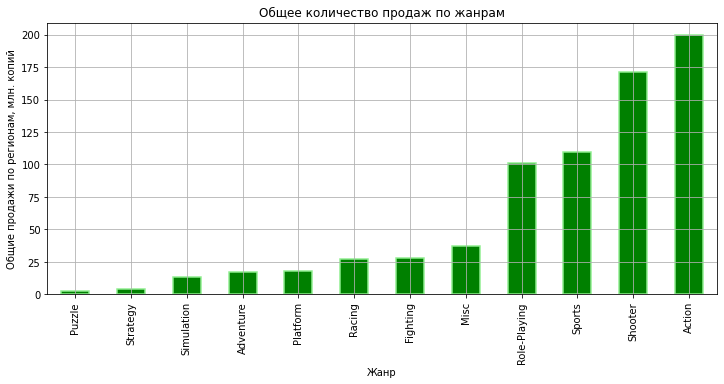

In [ ]:
(data_actual_period
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='bar', figsize=(12,5), color='g', edgecolor='lightgreen', linewidth=1.5, grid=True, legend=False)
)

plt.title('Общее количество продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи по регионам, млн. копий')

pass

Прибыльность жанров (медианное значение продаж):

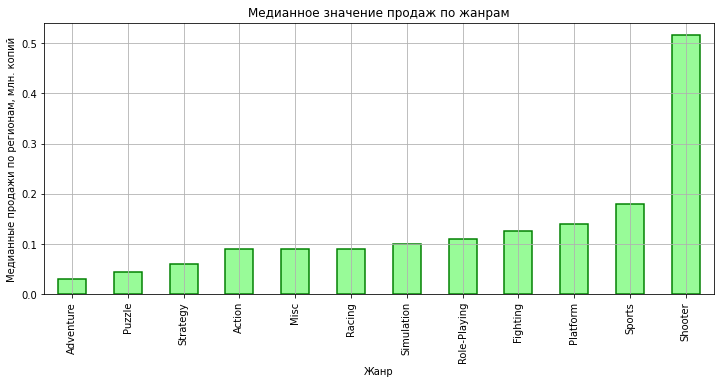

In [ ]:
(data_actual_period
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales')
    .plot(kind='bar', figsize=(12,5), color='palegreen', edgecolor='green', linewidth=1.5, grid=True, legend=False)
)

plt.title('Медианное значение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи по регионам, млн. копий')

pass

Сначала стоит сказать, что одна игра может относиться к нескольким жанрам одновременно (например Action + Adventure).

Наиболее прибыльны игры жанра Шутер. По числу проданных копий он уверенно лидирует среди своих конкурентов. <br>Далее следует Спорт и Платформеры.<br>

Об этих жанрах можно сказать следующее:
- достаточно просты в освоении;
- динамичны;
- как правило, не требуют большой умственной деятельности;
- передовые в плане графики (кроме платформеров);
- ТОП-игры Shooter имеют большой бюджет.


Таким образом, они рассчитаны на более обширную аудиторию.


Наименьшее количество медианных продаж у игр в жанрах Стратегия, Пазл, Приключения. Первые 2 жанра игр требуют большей состредоточенности, более напряженной работы мозга <br>

### Выводы

Проведен исследовательский анализ данных.


До 1991 года количество игр изменялось слабо. В дальнейшем произошел ощутимый рост. Пик этого роста пришелся на 2008 и 2009 гг., а далее случился сильный спад, многие платформы сошли с дистанции.

Т.к. цель работы - выявить определяющие успех игры закономерности, то стоит рассматривать более свежие игры. Период рассмотрения корректировался в процессе анализа, но в итоге принят временной отрезок 2014-2016 гг.

Выявлено, что для ТОП-5 платформ среднее время жизни составляет 10 лет.

Были определены лидеры продаж: на момент 2016 года с большим отрывом от конкурентов по продажам лидирует PS4, следом идет XOne, замыкает тройку - 3DS.

Судя по графику  'Продажи по платформам в период 2014-2016 гг. Изменение по годам' продажи игр падают у всех. Одной из главных причин, вероятно, является продолжающийся рост популярности онлайн игр (в т.ч. мобильных).


У XOne самое большое их лидеров по проданным копиям медианное значение продаж (при том, что PS4 и XOne вышли в одно время (ноябрь 2013 г., 3DS - фев 2011 г.)).<br>
У PS4 самое большое количество проданных копий одной игры. <br>

Проанализировав диаграммы рассеяния и матрицу корреляций для платформы PS4, можно сказать, что общие продажи игр на платформе PS4 зависят от оценки игр критиками и не зависят от оценки игр пользователями.

Во всех случаях (кроме одного) корреляция продаж и оценки критиков выше корреляции продаж и оценки пользователей. Значит, оценка критиков больше влиет на количество проданных копий. <br> Стоит отметить, что значение корреляции продажи/оценка критиков в каждом случае не превышает 0.5.

Наиболее прибыльны игры жанра Шутер. По числу проданных копий он уверенно лидирует среди своих конкурентов. <br>Далее следует Спорт и Платформеры.<br>
Наименьшее количество продаж у игр в жанрах Стратегия, Пазл, Приключения. Первые 2 жанра игр требуют большей состредоточенности, более напряженной работы мозга <br>


## Портрет пользователя каждого региона

### Определение для пользователя каждого региона (NA, EU, JP) самых популярных платформ (топ-5)

In [ ]:
print('Суммарные продажи по платформам. Разбивка по регионам, млн. копий:')
(data_actual_period
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))
    .format('{:.0f}')
)

Суммарные продажи по платформам. Разбивка по регионам, млн. копий:


,eu_sales,jp_sales,na_sales
platform,,,
PS4,130,15,99
XOne,46,0,81
X360,15,0,28
3DS,16,44,23
PS3,26,11,22
WiiU,13,7,19
PC,18,0,7
PSV,4,15,3
Wii,3,0,2


 Cамые популярные платформы за временной период 2014-2016 гг. представлены в таблице выше. Разбивка по графикам - ниже.<br>
 Популярность платформ для Северной Америки:

In [ ]:
pivot_for_pie_na = data_actual_period.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).reset_index()
pivot_for_pie_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


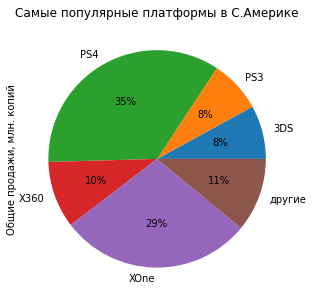

In [ ]:
pivot_for_pie_na = data_actual_period.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).reset_index()
pivot_for_pie_na['platform'] = pivot_for_pie_na['platform'].replace(['WiiU', 'PC', 'PSV', 'Wii', 'PSP'], 'другие')
(pivot_for_pie_na
    .groupby('platform')
    .agg('sum')
    .plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(6,5), legend=False)
)

plt.title('Самые популярные платформы в С.Америке')
plt.ylabel('Общие продажи, млн. копий')
plt.yticks([])

pass

 Популярность платформ для Европе:

In [ ]:
pivot_for_pie_eu = data_actual_period.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).reset_index()
pivot_for_pie_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


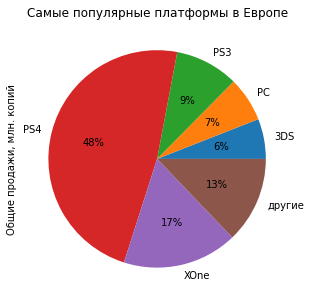

In [ ]:
pivot_for_pie_eu = data_actual_period.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).reset_index()
pivot_for_pie_eu['platform'] = pivot_for_pie_eu['platform'].replace(['X360', 'WiiU', 'PSV', 'Wii', 'PSP'], 'другие')
(pivot_for_pie_eu
    .groupby('platform')
    .agg('sum')
    .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(6,5), legend=False)
)

plt.title('Самые популярные платформы в Европе')
plt.ylabel('Общие продажи, млн. копий')
plt.yticks([])

pass

 Популярность платформ для Японии:

In [ ]:
pivot_for_pie_jp = data_actual_period.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).reset_index()
pivot_for_pie_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


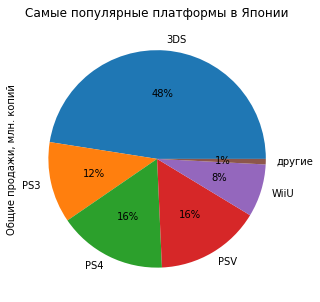

In [ ]:
pivot_for_pie_jp = data_actual_period.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).reset_index()
pivot_for_pie_jp['platform'] = pivot_for_pie_jp['platform'].replace(['PSP', 'XOne', 'X360', 'PC', 'Wii'], 'другие')
(pivot_for_pie_jp
    .groupby('platform')
    .agg('sum')
    .plot(kind='pie', x='platform', y='jp_sales', autopct='%1.0f%%', figsize=(6,5), legend=False)
)

plt.title('Самые популярные платформы в Японии')
plt.ylabel('Общие продажи, млн. копий')
plt.yticks([])

pass

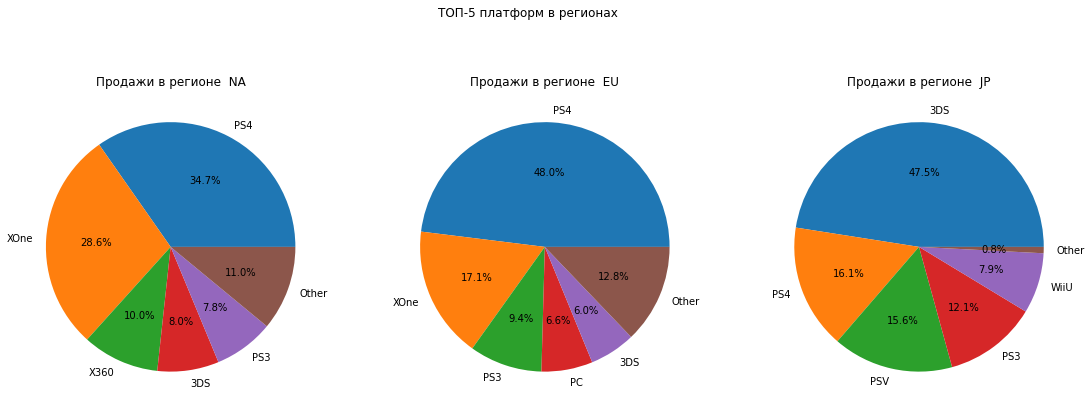

In [ ]:
# код ревьюера
# Создание сводной таблицы
pivot = data_actual_period.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

fig, axs = plt.subplots(1, 3, figsize=(19, 7)) # создаем фигуру с тремя осями в один ряд
fig.suptitle('ТОП-5 платформ в регионах') # подписываем ее

# Оставление только топ-5 значений и объединение остальных значений
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i, region in enumerate(regions):

    # Берем топ-5
    top5 = pivot.nlargest(5, region)[region]
    # Остальные продажи сохраняем в категорию Other
    other = pivot[region].sum() - top5.sum()
    top5['Other'] = other
    top5.plot(kind='pie', autopct='%1.1f%%', ax=axs[i])
    axs[i].set_ylabel(None)  # убираем подпись оси у
    axs[i].set_title(f"Продажи в регионе  {region.split('_')[0].upper()}") # подписываем саму диаграмму

plt.show()

Популярность игровых платформ:

1. в *Северной Америке* наиболее популярны (в порядке убывания): <br>
американо-японская PS4 (Sony Group Corp - японсая компания, Sony Interactive Entertainment - американская 'дочка'), американская XOne, 'другие платформы', американо-японская PS3 и японская DS делят 5 и 6 места;
<br><br><br>

2. в *Европе* предпочтения отличаются: <br>
PS4 - лидер (занимает почти половину рынка), далее идут XOne, 'другие платформы', PS3 и PC;
<br><br><br>

3. в *Японии*: <br>
абсолютный фаворит - местная 3DS от Nintendo (занимает почти половину рынка), PS4 и PSV делят 2 и 3 места, замыкают пятерку PS и WiiU.
<br><br><br>

### Определение для пользователя каждого региона cамых популярных игровых жанров (топ-5)

<AxesSubplot:xlabel='genre'>

<AxesSubplot:xlabel='genre'>

<AxesSubplot:xlabel='genre'>

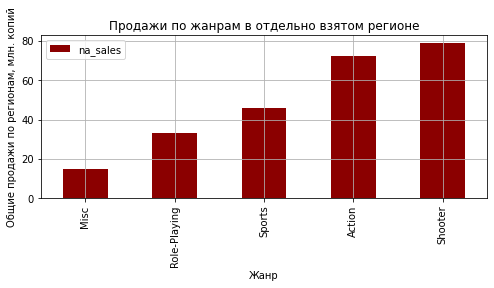

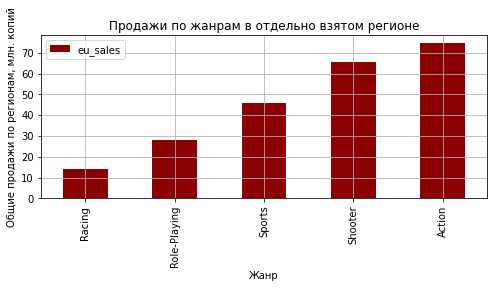

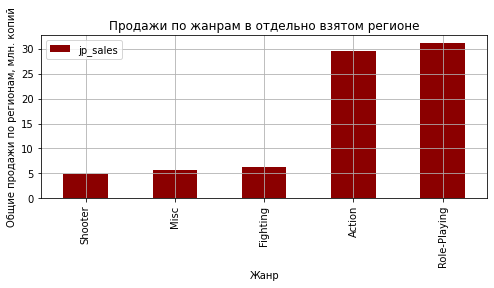

In [ ]:
for c in data_actual_period.columns:
    if c == 'na_sales' or c == 'eu_sales' or c == 'jp_sales':
        display(data_actual_period
        .groupby('genre')[[c]]
        .agg('sum')
        .sort_values(by=c)[-5:]
        .plot(kind='bar', y=c, grid=True, figsize=(8,3), color='darkred')
)

        plt.title('Продажи по жанрам в отдельно взятом регионе')
        plt.xlabel('Жанр')
        plt.ylabel('Общие продажи по регионам, млн. копий')

Популярность жанров:

1. в *Северной Америке*: <br>
в данном регионе любят пострелять, экшн, побегать и ...а также смешанный жанр и ролевые игры;<br><br><br>

2. в *Европе*: <br>
первая четверка - такая же, как и в С. Америке, разница только в том, что в Европе на 1 месте стоит action, а shooter на втором (влияет культурная близость, судя по всему), но в этом регионе гонки предпочтительнее, чем role-playing;
<br><br><br>

3. в *Японии*: <br>
лидер - ролевые игры, далее следуют action, fighting, misc, shooter. Отличия от ранее рассмотренных регионов очевидны. Предполагаю, что из-за культурных особенностей.
<br><br><br>
Интересно, что абсолютный лидер в каждом регионе один. Когда мы смотрели популярность игровых жанров во всех рассматриваемых регионах одновременно, было видно, что с наибольшим отрывом лидирует жанр shooter (медианное значение). На данном этапе анализа видно, что тон задают Северная Америка и Европа (в общем-то, у них больше населения -->  больше продаж).<br>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Возьмем все тот же актуальный период.

In [ ]:
data_actual_period['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

<AxesSubplot:xlabel='rating'>

<AxesSubplot:xlabel='rating'>

<AxesSubplot:xlabel='rating'>

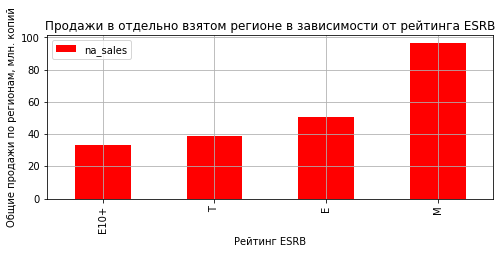

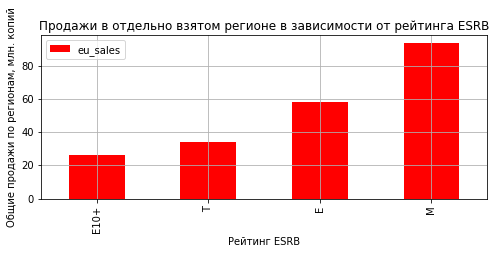

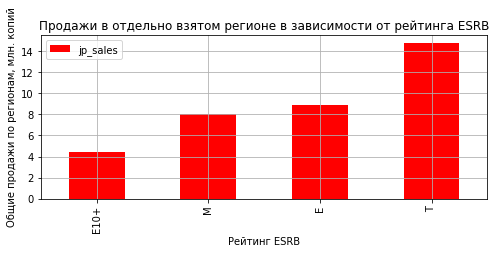

In [ ]:
for c in data_actual_period.columns:
    if c == 'na_sales' or c == 'eu_sales' or c == 'jp_sales':
        display(data_actual_period
        .groupby('rating')[[c]]
        .agg('sum')
        .sort_values(by=c)[-5:]
        .plot(kind='bar', y=c, grid=True, figsize=(8,3), color='red')

)

        plt.title('Продажи в отдельно взятом регионе в зависимости от рейтинга ESRB')
        plt.xlabel('Рейтинг ESRB')
        plt.ylabel('Общие продажи по регионам, млн. копий')

Создадим заглушку (-1) для отсутствующих значений в рейтинге ESRB и снова взглянем на графики:

In [ ]:
data_actual_period['rating'] = data_actual_period['rating'].fillna(-1)

/tmp/ipykernel_188/455893858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual_period['rating'] = data_actual_period['rating'].fillna(-1)


<AxesSubplot:xlabel='rating'>

<AxesSubplot:xlabel='rating'>

<AxesSubplot:xlabel='rating'>

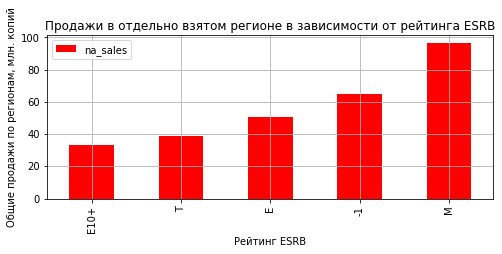

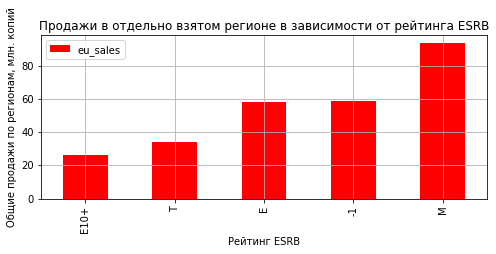

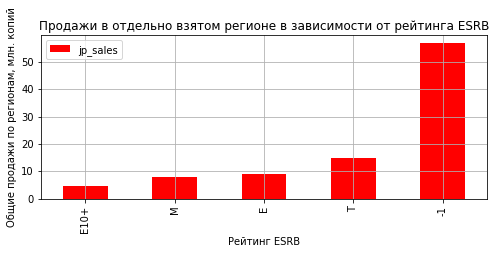

In [ ]:
for c in data_actual_period.columns:
    if c == 'na_sales' or c == 'eu_sales' or c == 'jp_sales':
        display(data_actual_period
        .groupby('rating')[[c]]
        .agg('sum')
        .sort_values(by=c)[-5:]
        .plot(kind='bar', y=c, grid=True, figsize=(8,3), color='red')

)

        plt.title('Продажи в отдельно взятом регионе в зависимости от рейтинга ESRB')
        plt.xlabel('Рейтинг ESRB')
        plt.ylabel('Общие продажи по регионам, млн. копий')

Посмотрим также на количество игр, сгруппированных по рейтингам:

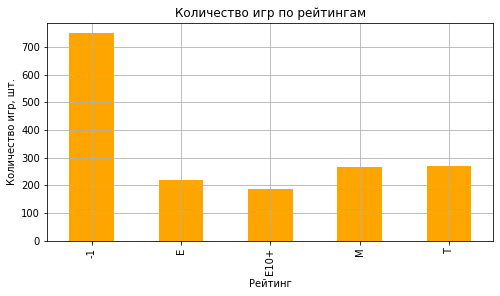

In [ ]:
(data_actual_period
        .groupby('rating')
        .agg({'name':'count'})
        .plot(kind='bar', grid=True, figsize=(8,4), color='orange', legend=False)
)

plt.title('Количество игр по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игр, шт.')

pass

Согласно информации из открытых источников  данный рейтинг имеет следующие категории:
1. «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими: Содержание вполне подходит для всех возрастов (ранее с 6 лет);
2. «E» («Everyone») — «Для всех»;
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
4. «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
5. «M» («Mature») — «Для взрослых»: : Материалы игры не подходят для лиц младше 17 лет;
6. «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.;
7. «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга;
8. «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M».

На исследуемых графиках есть все перечисленные рейтинги, кроме «RP 17+».

За актуальный период графики зависимости продаж от рейтинга показывают, что в С.Америке и Евпропе (с большим отрывом) 'игры для взрослых (17+)'. В Японии на первом месте игры, не получившие рейтинг. <br>
Второе место в С. Америке и Европе занимают игры без рейтинга ESRB, а в Японии - для подростков.<br>
Третье место во всех регионах принадлежит играм с рейтингом 'для всех'.<br>

<br><br>
Получается, что в С. Америке и Европе рейтинг ESRB влияет на продажи, а в Японии - нет . Стоит сделать поправку: количество игр без рейтинга - самое большое.

### Выводы

Портрет пользователя каждого региона (учитываются ТОП-3 платформы, жанра и рейтинга ESRB):

- Северная Америка:<br>
человек, играющий на американо-японской PS4 (с меньшей вероятностью в американскую XOne) в какой-нибудь шутер, экшн или спортивный симулятор, имеющий рейтинг 'для врослых (17+)', 'без рейтинга' или 'для всех';

- Европа:<br>
человек, играющий в заморскую PS4 или XOne в те же ТОП-3 жанра, что и американцы, и имеющие те же рейтинги, что и американцы (культурная близость);

- Япония: <br>
человек, отдающий сильное предпочтение местной платформе 3DS (или же, в меньшей степени, PS4 или PSV), предпочитающий  ролевые компьютерные игры, экшн или файтинг без рейтинга или же с рейтингом 'для подростков', 'для всех'.

В Северной Америке наблюдается наибольшее абсолютное число продаж. Но и населения здесь больше всего из представленных регионов.

Абсолютный жанровый лидер в каждом регионе один.

В Северной Америке и Европе наиболее популярны (с большим отрывом) 'игры для взрослых (17+)', в Японии - без рейтинга.

В С. Америке и Европе рейтинг ESRB влияет на продажи, а в Японии - нет. Стоит сделать поправку: количество игр без рейтинга - самое большое.

## Проверка гипотез

### Гипотеза 1 <br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br><br>
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [ ]:
data[(data['platform'] == 'XOne')]['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Среднее значение рейтинга пользователя для XOne - 6.52.

In [ ]:
data[(data['platform'] == 'PC')]['user_score'].describe()

count    755.000000
mean       7.065960
std        1.532718
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

Среднее значение рейтингов пользователей для PC - 7.07.

Проверим гипотезу о равенстве средних двух генеральных совокупностей 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые'. <br>
Выборка с PC сильно больше, чем выборка с XOne. В то же время в каждой выборке более сотни значений (т.е. вероятность получить случайный результат - ниже). Примем уровень статистической значимости, равный 0.01 (жесткий критерий).

In [ ]:
data_xone_user_rating = data_actual_period[(data_actual_period['platform'] == 'XOne')].query('user_score > 0')
data_pc_user_rating = data_actual_period[(data_actual_period['platform'] == 'PC')].query('user_score > 0')

alpha = .01

results = st.ttest_ind(data_xone_user_rating['user_score'], data_pc_user_rating['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


При текущем уровне значимости нулевую гипотезу отвергнуть не получилось. <br>
С большой вероятностью можно сказать, что пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Гипотеза 2 <br>
Средние пользовательские рейтинги жанров Action и Sports равны.
<br><br>
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [ ]:
data[(data['genre'] == 'Action')]['user_score'].describe()

count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

Среднее значение - 7.06.

In [ ]:
data[(data['genre'] == 'Sports')]['user_score'].describe()

count    1080.000000
mean        6.952778
std         1.619732
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

Среднее значение - 6.95.

Проверим гипотезу о равенстве средних двух генеральных совокупностей 'Средние пользовательские рейтинги жанров Action и Sports равны'. <br>
Выборки сильно отличаются размером, как и в предыдущей гипотезе: выборка Sports сильно меньше выборки Action (но, как мы помним, игр жанра Action в принципе больше). В то же время в каждой выборке более сотни значений (т.е. вероятность получить случайный результат - ниже). Примем уровень статистической значимости, равный 0.01 (жесткий критерий).

In [ ]:
data_action_user_rating = data_actual_period[(data_actual_period['genre'] == 'Action')].query('user_score > 0')
data_sports_user_rating = data_actual_period[(data_actual_period['genre'] == 'Sports')].query('user_score > 0')

alpha = .01

results = st.ttest_ind(data_action_user_rating['user_score'], data_sports_user_rating['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


При текущем уровне значимости нулевая гипотеза отвергается в пользу альтернативной: средние пользовательские рейтинги жанров Action и Sports не равны. <br>
С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют отличия и они статистически значимы.

### Выводы

Были проверены 2 нулевые гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

При заданном уровне значимости выходит, что с высокой долей вероятности пользовательские рейтинги XOne и PC не имеют статистически значимых отличий; с высокой долей вероятности пользовательские рейтинги жанров Action и Sports имеют отличия и они статистически значимы.

## Общий вывод

Настоящая работа была выполнена с целью выявления определяющих успешность игры закономерностей.
Для этого была выполнена предобработка данных, а затем проведен исследовательский анализ данных.
<br><br>

Установлено, что на данный момент пик роста популярности игр прошел и в данной индустрии идет активный спад. Тажке многие платформы сошли с дистанции. Одной из главных причин, вероятно, является продолжающийся рост популярности онлайн игр (в т.ч. мобильных).

Выявлено, что за принятый в данной работе актуальный период рассмотрения для ТОП-5 платформ среднее время жизни составляет 10 лет.

Были определены лидеры продаж: на момент 2016 года с большим отрывом от конкурентов по продажам лидирует PS4, следом идет XOne, замыкает тройку - 3DS.

У XOne самое большое из лидеров по проданным копиям медианное значение продаж.<br>
У PS4 самое большое количество проданных копий одной игры. <br>

Можно сказать, что общие продажи игр на платформе PS4 зависят от оценки игр критиками и не зависят от оценки игр пользователями.

Для других платформ также верно, что оценка критиков влиет на количество проданных копий чуть ниже среднего (значение корреляции продажи/оценка критиков в каждом одном случае не превышает 0.5); оценка пользователей не влияет на продажи.

Наиболее прибыльны игры жанра Шутер. По числу проданных копий он уверенно лидирует среди своих конкурентов. <br>Далее следуют Спорт и Платформеры.<br>
Наименьшее количество продаж у игр в жанрах Стратегия, Пазл, Приключения. Первые 2 жанра игр требуют большей состредоточенности, более напряженной работы мозга <br><br>


Популярность игровых платформ следующая (в порядке убывания):
1. в *Северной Америке* наиболее популярны: <br>
американо-японская PS4 (Sony Group Corp - японсая компания, Sony Interactive Entertainment - американская 'дочка'), американская XOne, 'другие платформы', американо-японская PS3 и японская DS делят 5 и 6 места;
<br>
2. в *Европе*: <br>
PS4 - лидер (занимает почти половину рынка), далее идут XOne, 'другие платформы', PS3 и PC;
<br>
3. в *Японии*: <br>
абсолютный фаворит - местная 3DS от Nintendo (занимает почти половину рынка), PS4 и PSV делят 2 и 3 места, замыкают пятерку PS и WiiU..
<br>
В Северной Америке наблюдается наибольшее абсолютное число продаж. Но и населения здесь больше всего из представленных регионов.


Портрет пользователя каждого региона (учитываются ТОП-3 платформы, жанра и рейтинга ESRB):

- Северная Америка:<br>
человек, играющий на американо-японской PS4 (с меньшей вероятностью в американскую XOne) в какой-нибудь шутер, экшн или спортивный симулятор, имеющий рейтинг 'для врослых (17+)', 'без рейтинга' или 'для всех';

- Европа:<br>
человек, играющий в заморскую PS4 или XOne в те же ТОП-3 жанра, что и американцы, и имеющие те же рейтинги, что и американцы (культурная близость);

- Япония: <br>
человек, отдающий сильное предпочтение местной платформе 3DS (или же, в меньшей степени, PS4 или PSV), предпочитающий  ролевые компьютерные игры, экшн или файтинг без рейтинга или же с рейтингом 'для подростков', 'для всех'.

В Северной Америке наблюдается наибольшее абсолютное число продаж. Но и населения здесь больше всего из представленных регионов.

Абсолютный жанровый лидер в каждом регионе один.

В Северной Америке и Европе наиболее популярны (с большим отрывом) 'игры для взрослых (17+)', в Японии - без рейтинга.

В С. Америке и Европе рейтинг ESRB влияет на продажи, а в Японии - нет. Стоит сделать поправку: количество игр без рейтинга - самое большое.


<br><br>
Были проверены 2 нулевые гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые (нулевая гипотеза не отвергнута);
- средние пользовательские рейтинги жанров Action и Sports разные (нулевая гипотеза отвергнута в пользоу альтернативной).

При заданном уровне значимости выходит, что с высокой долей вероятности пользовательские рейтинги XOne и PC не имеют статистически значимых отличий; с высокой долей вероятности пользовательские рейтинги жанров Action и Sports имеют отличия и они статистически значимы.

<br><br>
**Таким образом, резюмируя, выделим нижеследующие тезисы.** <br>
При подборе товаров для продажи стоит ориентироваться на то, для какой платформы выходит игра и выбирать лидеров (в последние годы это PS4, XOne, 3DS). А вот платформы PS3, X360, Wii потихоньку уходят а прошлое, хотя и собрали множество продаж - с ними стоит быть поосторожнее. <br>
Среднее время жизни игровых платформ составляет 10 лет. Это следует брать в расчет при планировании стратегии развития.<br>
Стоит прислушиваться к оценкам критиков, но не принимать их результаты как призывы к действию. А вот оценки пользователей не повлияют на продажи.<br>
'На первые полки' лучше ставить игры жанра Shooter (самый прибыльный жанр). Если есть возможность 'подсвечивать' товары отдельно для Японии, то для этого региона выделить ролевые игры, а для Европы - экшн. При этом для С. Америки и Европы это должны быть, в первую очередь, игры с ESRB рейтингом 'для взрослых (17+)', для Японии рейтинг ESRB не сильно важен;  <br>
Больше потенциальных клиентов - больше денег: предпочтительнее уделение внимания рынку Северной Америки и Европы.